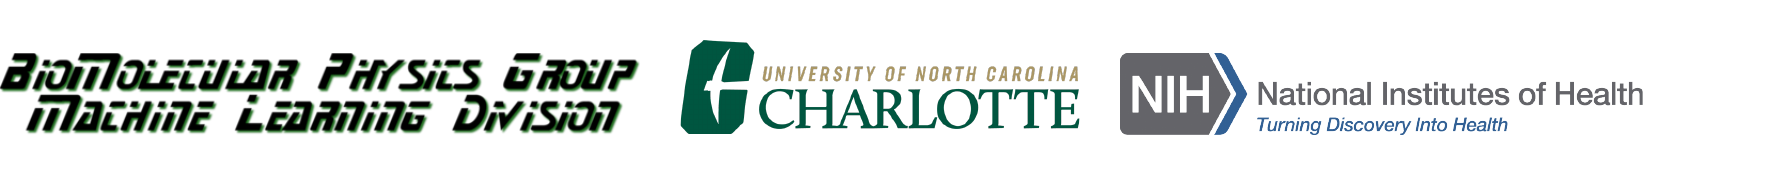

# <p style="text-align: center;">**pepStream 1.0.1**
<p style="text-align: center;">Created: by John Patterson
<p style="text-align: center;">Developed by: Tyler Grear, Chris Avery, and Nathaniel Mauney
<hr style="border:2px solid black">

## <u> pepStream notebook prototype
This code relies on packages : \n

To run this using cluster resources please run : \n

Copy all the run files to a new directory to prevent overwriting output \n

# <u>Pep-Stream Driver - SLURM - UNCC
* This notebook uses a BASH kernel and runs the PepStream Workflow
  * Some of the core code is Python, and is called from the cells in this notebook after loading python3
  * Some analysis used R sripts and those are called from cells in this notebook after loading R
* Terminology:
  * MoRF = Molecular Recognition Feature, the term derives from the study of disordered proteins
  * cMoRF = A peptide that is complementary to a MoRF, meaning that it is likely to bind/interact with the MoRF
* Dependencies:
  * Linux environment with BASH shell
  * SLURM job scheduler
  * Python version 3
  * Java 1.8.0 or higher
  * R version 3 or 4
  * NCBI BLAST+ with Swissprot, NR, and PDBAA databases
  * iTASSER Suite 5.2
  * Z-DOCK Suite 3.0.2

## PepStream Project Description
* The PepStream Project is intended to assist with the construction of interating/blocking peptides
* The project implements a 'funnel' search method to maximize the chance of finding potential candidates
* The Key Steps in the Process are:
1. Enter a sequence of interest for a segment of your target protein: May be a MORF or binding site
2. Diversify the sequence by finding as many homologs as possible in the search space
3. Seach the PDB library for structural matches and extract those peptides
4. Examine those peptides for their interactions with other parts of the protein and extract 'contiguous' sets of residues (cMORFs)
5. Build a model of the target protein for docking
6. Build models of all the extracted fragments (cMORFs) for docking
7. Run All-to-All docking simulations of target protein with the fragments (cMORFs)
8. Sort and filter the docking results and report the top X% of best results


In [7]:
username = "tgrear"                     # Insert HPC username string from username.hpc.uncc

In [8]:
# Python package check and update - TG (09-10-2022)
import os                               # Import miscellaneous operating system interfaces module for portability
import sys                              # Import system-specific parameters and functions module
fsep = os.sep                           # Get OS file seperator
home = os.path.expanduser("~")          # Should work for any OS to get home directory path
os.chdir(home+fsep+"pepStream")         # Navigate to pepStream directory [NM this step needs generalized with os.walk()]

if 'pipreqs' in sys.modules == False:   # If pipreqs module does not exist
    os.system("pip install pipreqs")    # ^-- Install pipreqs

libPath = home+fsep+"pepStream"+fsep+"libCheck"  # Get path to libCheck directory that contains all python scripts
os.chdir(libPath)                                # Navigate to libCheck directory
os.system("pipreqs --force")                     # Execute pipreqs to identify required python packages/modules, force overwrite
os.system("pip install -r requirements.txt")     # Use generated requirements.txt file to update required packages/modules
print("-----------------------------------------------------------------------------")
print("pepStream: required python packages have been installed/updated successfully.")
os.chdir("..")                                   # Navigate back to primary pepStream directory

INFO: Successfully saved requirements file in /users/tgrear/pepStream/libCheck/requirements.txt


-----------------------------------------------------------------------------
pepStream: required python packages have been installed/updated successfully.


In [9]:
# Define the search sequence here : Example is xrd of RIN4 - CNOI of RIN4
MySequence = "PKPTNLRADESPEKVTVVPKFGDWDENNPSSADGYTHIFNKVREERSSGA" # Please keep the "" around the sequence


with open('sequenceOfInterest.fasta', 'w') as f:
    print(">contigous sequence for pepStream auto-designed peptides", file=f)
    print(MySequence, file=f)
f.close()

# Creates the search fragements of the seqeuence

In [10]:
# Variable c1 defines how many partitions to make. Note: at least 3 letter long sequences are needed for BLAST
#7
%run WindowFootprint.py --f1 sequenceOfInterest.fasta --c1 13 

No job_id supplied, creating a folder with a random name: out_seq_855788
['PKPTNLRADESPEKVTVVPKFGDWDENNPSSADGYTHIFNKVREERSSGA', 'PKPTNLRADESPEKVTVVPKFGDWD', 'ENNPSSADGYTHIFNKVREERSSGA', 'PKPTNLRADESP', 'EKVTVVPKFGDWD', 'ENNPSSADGYTH', 'IFNKVREERSSGA']
[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
   

In [11]:
pwd

'/users/tgrear/pepStream/out_seq_855788'

In [12]:
# get new dir name with fragmented sequences
#os.system("ls")
import os
os.listdir()

['Footprint_1',
 'Footprint_2',
 'Footprint_3',
 'Footprint_4',
 'Footprint_5',
 'Footprint_6',
 'Footprint_7']

In [131]:
# navigate into said directory: might be unneeded if windowfootprint was run 
#os.chdir('..')
os.chdir('out_seq_934632')

FileNotFoundError: [Errno 2] No such file or directory: 'out_seq_934632'

In [67]:
# Submit psiBLAST job, first BLAST analysis
## MUST move run scipt into dir ##
os.system("cp ../run_psiBLAST.slurm .")
os.system("sbatch run_psiBLAST.slurm")

Submitted batch job 2269940


0

In [71]:
# The previous jobs must finish entirely before running the next step
# To see status of your jobs on slurm cluster
import os
print(os.popen('squeue -u tgrear').read())


             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)



In [46]:
# Create mutant sequences for searching PDB
os.system("cp ../make_mutatnt_seqs.sh .")
os.system("cp ../mutantFootprints_2.py .")
os.system("sbatch make_mutatnt_seqs.sh")
#os.system("./make_mutatnt_seqs.sh")
#print(os.popen("./make_mutatnt_seqs.sh").read())
print(os.popen('squeue -u jpatte75').read())
os.listdir()

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           1754950     Orion  DivSeqs jpatte75 PD       0:00      1 (Priority)



['mutated_footprints2.0.csv',
 'Footprint_6',
 'mutated_footprints3.0.fasta',
 'Footprint_3',
 'mutantFootprints_2.py',
 'mutated_footprints1.0.csv',
 'error_DivSeqs.err',
 'shortblast.log',
 'Footprint_1',
 'make_mutatnt_seqs.sh',
 'mutated_footprints4.0.csv',
 'mutated_footprints.fasta',
 'DivSeqs.log',
 'fragSO.py',
 'make_specific_docks.sh',
 'mutated_footprints3.0.csv',
 'error_BLAST.err',
 'homologs.fasta',
 'mutated_footprints2.0.fasta',
 'Footprint_2',
 'results.out',
 'Footprint_5',
 'PSS2Seqs.py',
 'run_psiBLAST.slurm',
 'mutated_footprints1.0.fasta',
 'Footprint_0',
 'getFragSO_v2.py',
 'Footprint_4',
 'mutated_footprints4.0.fasta',
 'run_pBLAST.slurm']

In [47]:
# The previous jobs must finish entirely before running the next step
# To see status of your jobs on slurm cluster
print(os.popen('squeue -u jpatte75').read())
print(os.popen('cat error_DivSeqs.err').read())
print(os.popen('tail -5 DivSeqs.log').read())


             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           1754950     Orion  DivSeqs jpatte75 PD       0:00      1 (Priority)

Smith-Waterman local alignment of sequences
Smith-Waterman local alignment of sequences
slurmstepd: error: *** JOB 1754948 ON str-c149 CANCELLED AT 2021-12-13T15:29:32 ***
slurmstepd: error: *** JOB 1754949 ON str-c53 CANCELLED AT 2021-12-13T15:29:32 ***




In [49]:
# Search PDB for distant strucutral hits, then mine these matches for peptides
# This will produce raw fasta reads for the peptides, this will take a significant amount of time
os.system("cp ../run_pBLAST.slurm .")
os.system("sbatch run_pBLAST.slurm")

0

In [84]:
# The previous jobs must finish entirely before running the next step
# To see status of your jobs on slurm cluster
print(os.popen('squeue -u jpatte75').read())
print(os.popen('cat error_BLAST.err').read())


             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           1754963     Orion pBLAST_a jpatte75  R    6:56:50      1 str-c149
           1754983     Orion dockmode jpatte75  R    6:32:20      1 str-c137

cat: mutated_footprints.fasta: input file is output file



In [66]:
# You MUST create a docking model of the entire target protein
# This can be run immediatly after the previous step as it is an unrelated computation

# Define the target protein sequence here : Example is RIN4 
MySequence = "MARSNVPKFGNWEAEENVPYTAYFDKARKTRAPGSKIMNPNDPEYNSDSQSQAPPHPPSSRTKPEQVDTV\
RRSREHMRSREESELKQFGDAGGSSNEAANKRQGRASQNNSYDNKSPLHKNSYDGTGKSRPKPTNLRADESPEKVTVVPKFGDWDENNPS\
SADGYTHIFNKVREERSSGANVSGSSRTPTHQSSRNPNNTSSCCCFGFGGK" 
# Please keep the "" around the sequence


with open('proteinOfInterest_RIN4.fasta', 'w') as f:
    print(">protein sequence for pepStream docking routine", file=f)
    print(MySequence, file=f)
f.close()

os.system("cp ../run_iTasser_dockmodel.sh .")
os.system("sbatch run_iTasser_dockmodel.sh")

0

In [ ]:
# After generating valid cMoRFs and the docking strucutres
# Run I-TASSER  Z-DOCK : pass 1
print(os.popen('sbatch runPepStream_PhysicalFilter.sh').read())

In [ ]:
# The previous jobs must finish entirely before running the next step
# There will be many many jobs
# To see status of your jobs on slurm cluster
print(os.popen('squeue -u jpatte75').read())

In [ ]:
# This creates a corse grain sort order off overall afffinity of the designed peptide against the entire target structure
%run format_output.py 

In [ ]:
# Run Z-DOCK : pass 2
# Define the specific sites of docking
import numpy

MoRF1=numpy.arange(10, 30, 1)
        numpy.savetxt('MoRF1_Block_Residues.txt', MoRF1, delimiter =', ')
MoRF12=10:1:50
        numpy.savetxt('MoRF12_Block_Residues.txt',MoRF12, delimiter =', ')
MoRF2=40:1:50
        numpy.savetxt('MoRF2_Block_Residues.txt', MoRF2, delimiter =', ')
MoRF3=140:1:160
        numpy.savetxt('MoRF3_Block_Residues.txt', MoRF3, delimiter =', ')
Loop=100:1:120
        numpy.savetxt('Loop_Block_Residues.txt', Loop, delimiter =', ')

os.system("./make_specific_docks.sh")
# Fine grain sort order by docking specific subsites of the entire target strucutre
# False positives are included in this evaluation to understand specificity of the binding peptide
# This must be defined in the docking scripts for new target struct
os.system("sbatch runPepStream_AnalyzeFilter.slurm")

In [ ]:
# The previous jobs must finish entirely before running the next step
# To see status of your jobs on slurm cluster
print(os.popen('squeue -u jpatte75').read())
print(os.popen('cat error_BLAST.err').read())

In [ ]:
# Work up results
# Contains graphical outputs, textual outputs for sorted predictions, and runs ML models over the data to predict best sort
# Note that the ML routines are trained off DELLA peptide data 
%run format_output_specific.py